# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [62]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")
df

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

df = df.rename(columns={"st":"state"})

df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [65]:
#Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F"
df['gender'].unique() # check the unique values in the column


array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [66]:
# Now define a function to clean the column
def clean(x):
    if x in ['M', 'MALE']:
        return 'Male'
    elif x.startswith('F'):
        return 'Female'
    else:
        return 'U'
    
# Replace NaN values with a placeholder value
df['gender'].fillna('U', inplace=True)


df['gender'] = list(map(clean, df['gender']))

In [67]:
# Check again
df['gender'].unique()

array(['U', 'Female', 'Male'], dtype=object)

In [68]:
#State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington
df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [69]:
df['state'].replace({"AZ": "Arizona", "WA": "Washington"}, inplace=True)


In [70]:
df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       nan], dtype=object)

In [71]:
#In education, "Bachelors" could be replaced by "Bachelor
df['education'].replace({"Bachelors":"Bachelor"}, inplace=True)

In [72]:
# Check again
(df["education"].unique())

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor',
       nan], dtype=object)

In [73]:
# In Customer Lifetime Value, delete the `%` character
df['customer_lifetime_value'] = pd.to_numeric(df['customer_lifetime_value'].str.rstrip('%').astype(float) / 100, errors='coerce')

display(df.head(20))

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,Female,Bachelor,6979.5359,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,Female,Bachelor,12887.4317,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,Male,Bachelor,7645.8618,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,Male,High School or Below,5363.0765,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,Female,Bachelor,8256.2978,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,Female,College,5380.8986,55350.0,67.0,1/0/00,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,Male,Master,7216.1003,0.0,101.0,1/0/00,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,Male,Bachelor,24127.5040,14072.0,71.0,1/0/00,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,Female,College,7388.1781,28812.0,93.0,1/0/00,Special Auto,Four-Door Car,425.527834


In [74]:
# In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"
df['vehicle_class'].unique()
df['vehicle_class'].replace({"Sports Car":"Luxury" , "Luxury SUV":"Luxury" ,"Luxury Car":"Luxury" }, inplace=True)

In [75]:
# Check again
(df["vehicle_class"].unique())


array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury', nan],
      dtype=object)

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [76]:
print(df.dtypes)
#I've already correct the data type of Customer lifetime value

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object


In [77]:
df["number_of_open_complaints"].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [78]:
def middle_value(complaint):
    if isinstance(complaint, str):  # Check if it's a string
        parts = complaint.split('/')
        if len(parts) == 3:
            return int(parts[1])
    return None  # Return None for non-matching or non-string values


df['number_of_open_complaints'] = df['number_of_open_complaints'].apply(middle_value)

In [79]:
# Check again
(df["number_of_open_complaints"].unique())

array([ 0.,  2.,  1.,  3.,  5.,  4., nan])

In [80]:
# correcting data types
df['number_of_open_complaints'] = pd.to_numeric(df['number_of_open_complaints'], errors='coerce').astype('Int64')
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      Int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [81]:
(df["number_of_open_complaints"].unique())

<IntegerArray>
[0, 2, 1, 3, 5, 4, <NA>]
Length: 7, dtype: Int64

In [82]:
df.head(20)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,Female,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,Female,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,Male,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,Male,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,Female,Bachelor,8256.2978,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,Female,College,5380.8986,55350.0,67.0,0,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,Male,Master,7216.1003,0.0,101.0,0,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,Male,Bachelor,24127.5040,14072.0,71.0,0,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,Female,College,7388.1781,28812.0,93.0,0,Special Auto,Four-Door Car,425.527834


## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [83]:
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,Female,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,Female,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,Male,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,Male,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,U,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
4004,NaN,NaN,U,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
4005,NaN,NaN,U,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
4006,NaN,NaN,U,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


In [84]:
null_count = df.isnull().sum()
null_count

customer                     2937
state                        2937
gender                          0
education                    2937
customer_lifetime_value      2940
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64

In [85]:
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      Int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [86]:
# The number of rows with null values is hughe, so I think drop the rows is not a good idea
# I apply different strategy for numeric variables (median) than from categorical (mode) 
# I choose this trying to preserve the data while mitigating the impact of missing values

In [87]:
#numeric variables
df['customer_lifetime_value'].fillna(df['customer_lifetime_value'].mean(), inplace=True)
df['income'].fillna(df['income'].mean(), inplace=True)
df['monthly_premium_auto'].fillna(df['monthly_premium_auto'].mean(), inplace=True)
df['total_claim_amount'].fillna(df['total_claim_amount'].mean(), inplace=True)

In [88]:
# categorical variables
df['state'].fillna(df['state'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['policy_type'].fillna(df['policy_type'].mode()[0], inplace=True)
df['vehicle_class'].fillna(df['vehicle_class'].mode()[0], inplace=True)
df['number_of_open_complaints'].fillna(df['number_of_open_complaints'].mode()[0], inplace=True)

In [89]:
#For customer I think is better to fill with an X, this way I can see which one is authentic and which not

In [90]:
df['customer'].fillna("X", inplace=True)

In [91]:
#Check
null_count = df.isnull().sum()
null_count

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [92]:
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,7936.902593,0.000000,1000.00000,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,Female,Bachelor,6979.535900,0.000000,94.00000,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,Female,Bachelor,12887.431700,48767.000000,108.00000,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,Male,Bachelor,7645.861800,0.000000,106.00000,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,Male,High School or Below,5363.076500,36357.000000,68.00000,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,X,Oregon,U,Bachelor,7936.902593,39295.701214,193.23436,0,Personal Auto,Four-Door Car,404.986909
4004,X,Oregon,U,Bachelor,7936.902593,39295.701214,193.23436,0,Personal Auto,Four-Door Car,404.986909
4005,X,Oregon,U,Bachelor,7936.902593,39295.701214,193.23436,0,Personal Auto,Four-Door Car,404.986909
4006,X,Oregon,U,Bachelor,7936.902593,39295.701214,193.23436,0,Personal Auto,Four-Door Car,404.986909


In [93]:
#After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`
numeric_columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']

def convert_to_integer(value):
    if isinstance(value, (int, float)):
        return int(value)
    return value

df[numeric_columns] = df[numeric_columns].applymap(convert_to_integer)

In [94]:
df.dtypes

customer                     object
state                        object
gender                       object
education                    object
customer_lifetime_value       int64
income                        int64
monthly_premium_auto          int64
number_of_open_complaints     Int64
policy_type                  object
vehicle_class                object
total_claim_amount            int64
dtype: object

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [95]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4003     True
4004     True
4005     True
4006     True
4007     True
Length: 4008, dtype: bool

In [96]:
duplicated_count = df.duplicated().sum()
display(duplicated_count)

2936

In [97]:
# At this point, I think maybe I've just should drop the rows with null values
# Then now I choose this strategy and drop all the duplicate rows that are exactly the same

In [98]:
df.drop_duplicates()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,U,Master,7936,0,1000,0,Personal Auto,Four-Door Car,2
1,QZ44356,Arizona,Female,Bachelor,6979,0,94,0,Personal Auto,Four-Door Car,1131
2,AI49188,Nevada,Female,Bachelor,12887,48767,108,0,Personal Auto,Two-Door Car,566
3,WW63253,California,Male,Bachelor,7645,0,106,0,Corporate Auto,SUV,529
4,GA49547,Washington,Male,High School or Below,5363,36357,68,0,Personal Auto,Four-Door Car,17
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,Cali,Female,High School or Below,20314,63209,102,2,Personal Auto,SUV,207
1068,GS98873,Arizona,Female,Bachelor,3239,16061,88,0,Personal Auto,Four-Door Car,633
1069,CW49887,California,Female,Master,4626,79487,114,0,Special Auto,SUV,547
1070,MY31220,California,Female,College,8997,54230,112,0,Personal Auto,Two-Door Car,537


# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [99]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [100]:
# Your code here

# Lab | Customer Analysis Round 3


## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data

Show DataFrame info.
- Describe DataFrame.
- Show a plot of the Gender breakdown.
- Show a plot of Income by State.
- Show a plot of the Policy Type by the Total Claim Amount.
- Show a plot of the Education by Vehicle Class.
- What insights can you establish from these plots?
- What other plots do you feel would be beneficial?

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer                   4008 non-null   object
 1   state                      4008 non-null   object
 2   gender                     4008 non-null   object
 3   education                  4008 non-null   object
 4   customer_lifetime_value    4008 non-null   int64 
 5   income                     4008 non-null   int64 
 6   monthly_premium_auto       4008 non-null   int64 
 7   number_of_open_complaints  4008 non-null   Int64 
 8   policy_type                4008 non-null   object
 9   vehicle_class              4008 non-null   object
 10  total_claim_amount         4008 non-null   int64 
dtypes: Int64(1), int64(4), object(6)
memory usage: 348.5+ KB


In [106]:
df.shape

(4008, 11)

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,4008.0,7936.107784,3320.523664,2004.0,7936.0,7936.0,7936.0,58166.0
income,4008.0,39295.187375,15745.139241,0.0,39295.0,39295.0,39295.0,99960.0
monthly_premium_auto,4008.0,193.062625,827.41843,61.0,145.75,193.0,193.0,35354.0
number_of_open_complaints,4008.0,0.105289,0.488849,0.0,0.0,0.0,0.0,5.0
total_claim_amount,4008.0,404.141218,151.430161,0.0,404.0,404.0,404.0,2893.0


In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# Show a plot of the Gender breakdown.
gender_counts = df['gender'].value_counts()

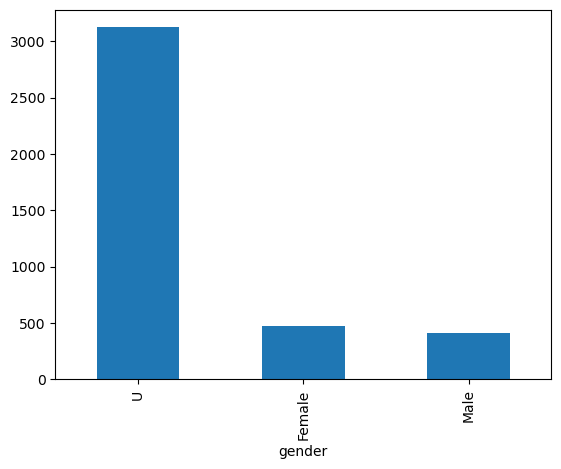

In [130]:
gender_counts.plot(kind='bar')
plt.show()

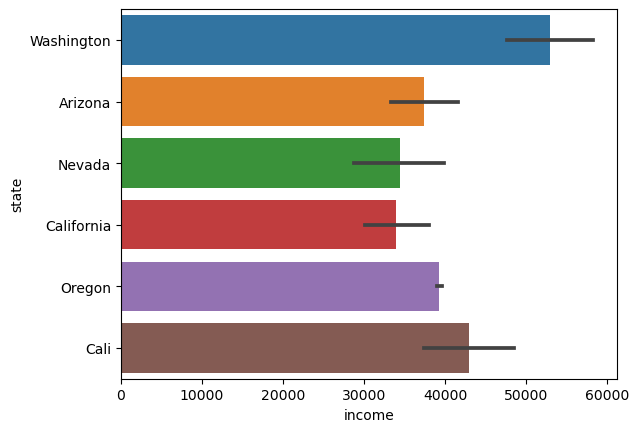

In [127]:
# Show a plot of Income by State.
sns.barplot(x="income", y="state", data=df)
plt.show()

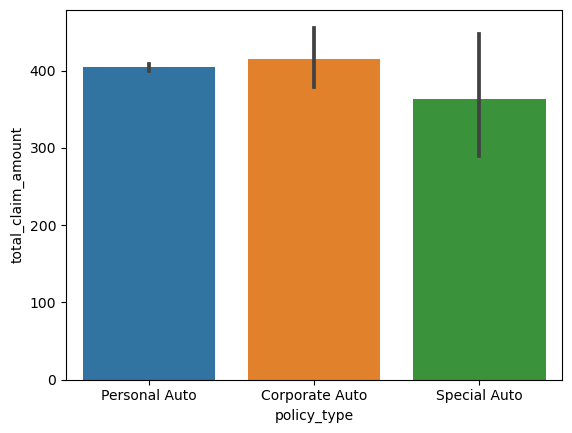

In [128]:
# Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x="policy_type", y="total_claim_amount", data=df)
plt.show()

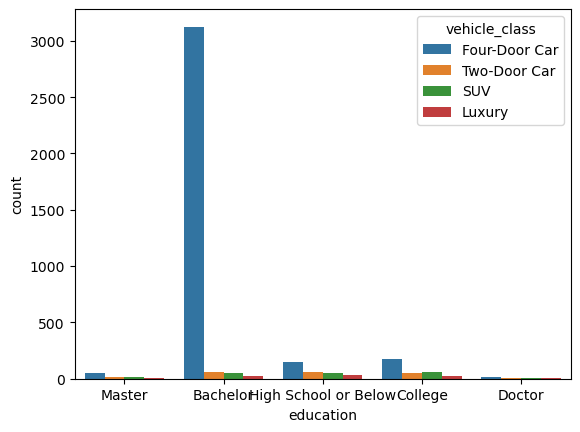

In [135]:
# Show a plot of the Education by Vehicle Class.
sns.countplot(data=df, x='education', hue='vehicle_class')
plt.show()


### What insights can you establish from these plots? 
- I have a problem with gender data
- Washington has a high income compare to California or Nevada
- 
### What other plots do you feel would be beneficial?